# Question 2

This method will instead be minimising $\chi^2$
where:

\begin{align*}
\chi^2 = \frac{(y-f(x_i;a))^2}{\sigma_i^2}
\end{align*}

\begin{align*}
ln(L) = -\sum{\chi^2}
\end{align*}

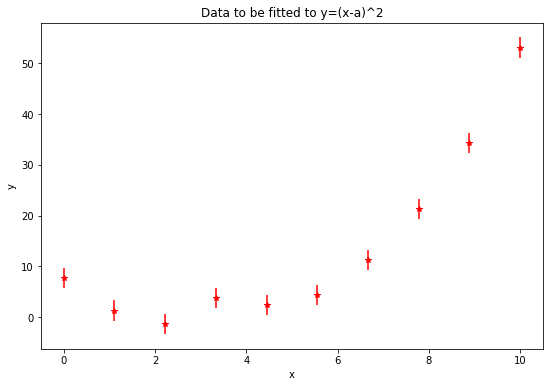

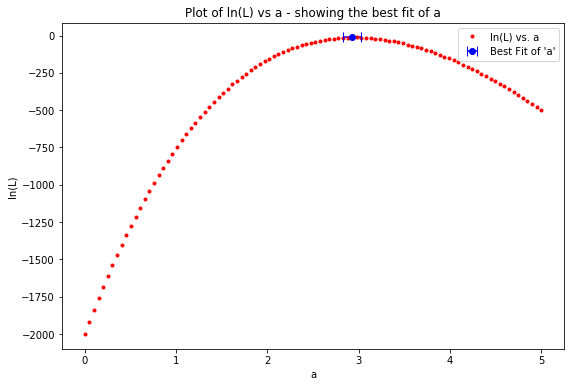

a = 2.929292929292929
lower Sigma = 0.10101010101010077
upper Sigma = 0.10101010101010122
max L: -12.603267670117509


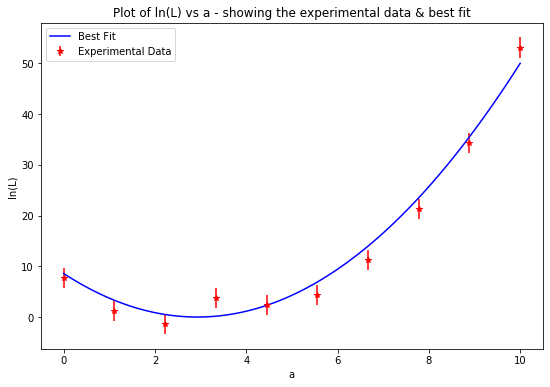

In [3]:
%matplotlib inline
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math
import numpy as np

x=y=dy=0
W = loadmat('W4dataP1.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['x', 'y', 'dy']})

figure = plt.figure(figsize=(9,6))
plot = plt.subplot(1,1,1)
plt.errorbar(x,y,dy, fmt='r*')
plt.title("Data to be fitted to y=(x-a)^2")
plt.ylabel("y"); plt.xlabel("x")
plt.show()

## MAXIMUM LIKELIHOOD FUNCTIONS
def f(x,a):
    return (x-a)**2

def P(y,sigma,f):
    return ((y-f)**2)/(sigma**2)

def lnL(a):
    lnL = 0
    for i in range(len(y)):
        lnL -= P(y[i],dy[i],f(x[i],a))
    return lnL

## Plot
figure = plt.figure(figsize=(9,6))
plot = plt.subplot(1,1,1)

## Store max values for A and L along with every other value for later.
bestA = None
maxL = 0
L = {}

## Ranges
minA = 0
maxA = 5
resolution = 100

step = (maxA-minA)/(resolution-1) ## Calculate step for use later.

## Loop every value of a in a given range and resolution and store 
## the calculated value of L if it is greater than the previous.
for a in np.linspace(minA,maxA,resolution):
    L[a] = lnL(a)
    if bestA is None or L[a] > maxL:
        maxL = L[a]
        bestA = a

plot.plot(*zip(*L.items()),"r.",label="ln(L) vs. a")
plt.xlabel("a")
plt.ylabel("ln(L)")
plt.title("Plot of ln(L) vs a - showing the best fit of a")


# Store the best value of the upper and lower error, and check if a closer
# value is available.
upperA = None
lowerA = None

for a, Lvalue in L.items():
    if(Lvalue <= maxL-1):
        if(a < bestA):
            if(lowerA is None or abs(a-bestA) < lowerA):
                 lowerA = abs(a-bestA)
        elif(a > bestA):
            
            if(upperA is None or abs(a-bestA) < upperA):
                upperA = abs(a-bestA)

# Plot best fit a and its error
error = [[lowerA],[upperA]]
plot.errorbar(bestA,maxL, xerr=error, fmt="bo",capsize=5,label="Best Fit of 'a'")
plot.legend()
plt.show()


print("a = "+str(bestA))
print("lower Sigma = "+str(lowerA))
print("upper Sigma = "+str(upperA))
print("max L: "+str(maxL))
        

figure = plt.figure(figsize=(9,6))
plot = plt.subplot(1,1,1)
plt.xlabel("a")
plt.ylabel("ln(L)")
plt.errorbar(x,y,dy, fmt='r*', label="Experimental Data")
plt.title("Plot of ln(L) vs a - showing the experimental data & best fit")

x = np.linspace(np.min(x),np.max(x),100)
y = f(x,bestA)

plt.plot(x,y,"b-", label="Best Fit")
plt.legend()
plt.show()

Question 1 & Question 2 share similar plots of $ln(L)$ vs $a$.
Python auto adjusts the axis so the graphs look identical, however the second graph ranges from 
0 to -2000, whereas the first ranges from 0 to -1000. This means that the second graph has a steeper
gradient.

The value of $-\chi^2$ must fall off by 1 to find the $1\sigma$ error, compared to 1/2 for Problem 1.
This is because the factor of 2 is no longer in the equation being minimised, causing it to be twice the previous
equation. 

Values for $\hat{a}$ and its error have been calculated, and the original dataset has been plotted
with the fitted function.